## Assignment 6: weather

Get the data from: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Plot:

~~The temperature~~  
~~The mean temperature each day~~   
~~The mean temperature for each month~~  
60% of the marks will be given for the above  

For the last 40%

Plot:

~~The Windspeed (there is data missing from this column) ~~  
~~The rolling windspeed (say over 24 hours)~~  
~~The max windspeed for each day~~  
The monthly mean of the daily max windspeeds (yer I am being nasty here)  
You do not need to over comment your code. Marks will be given for how nice the plots are.  

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
relevant_column_names = ['date', 'temp', 'wdsp'] # setting specific columns to be read in to avoid reading entire CSV file
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', usecols=relevant_column_names, skiprows=23, low_memory=False) 
# low_memory=False specified to aviod warnings working with the dataset due to inconsistent datatypes in the column and large amount of data
print(df.columns) # checking column names are correct
print(df.dtypes) # checking data types in columns after reading in csv file

Index(['date', 'temp', 'wdsp'], dtype='object')
date     object
temp    float64
wdsp     object
dtype: object


In [101]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M',dayfirst=True) # converting the date field to a datetime series
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')  # using 'coerce' to catch errors in the conversion to numeric datatype due to missing data in the csv file for this column
print(df.dtypes)

df.set_index('date', inplace=True) # setting the date as the index

date    datetime64[ns]
temp           float64
wdsp           float64
dtype: object


## Temperature over time
***

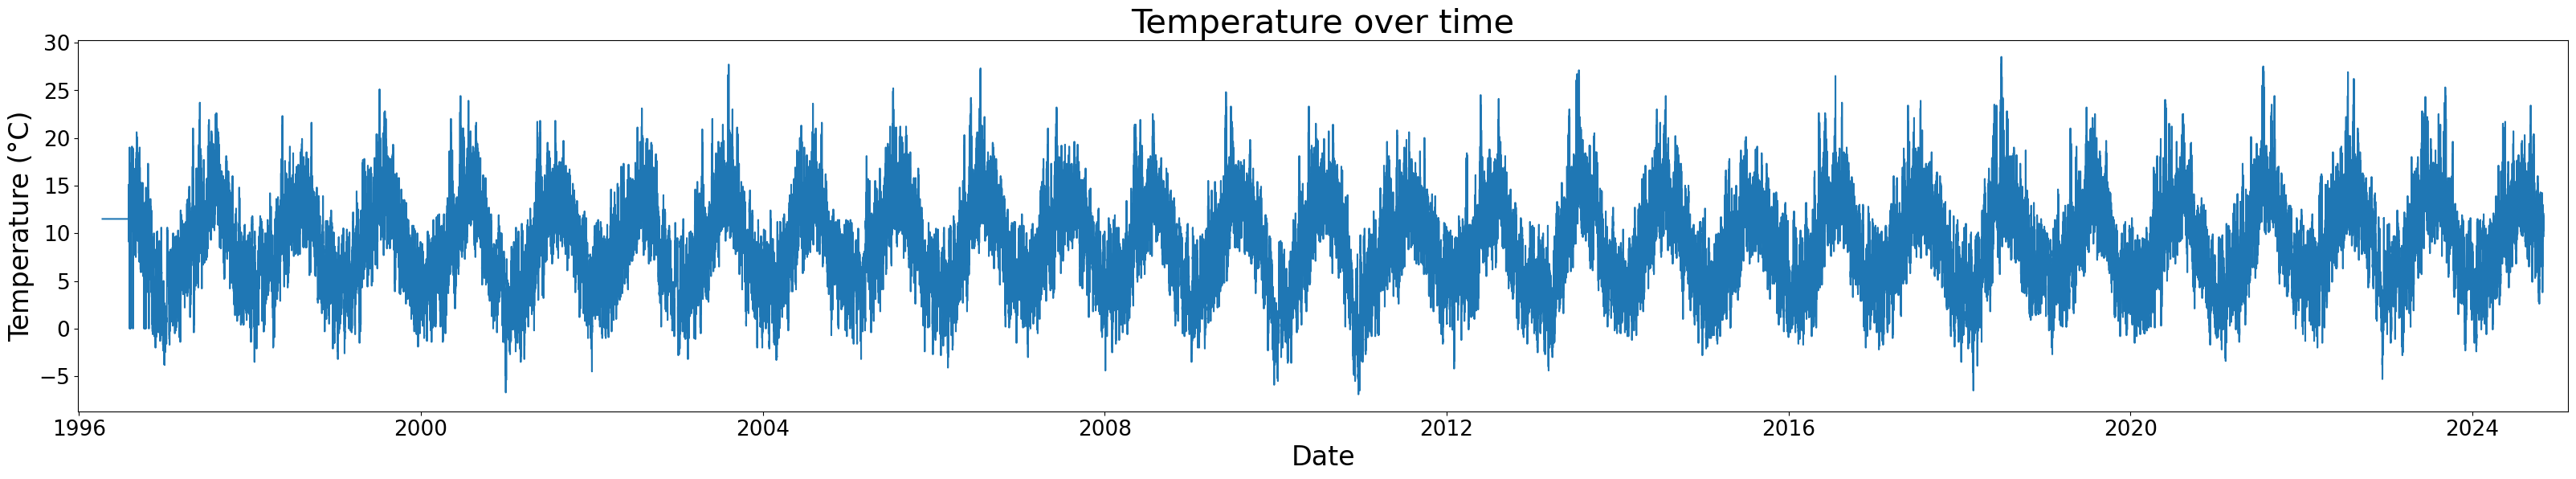

In [177]:
plt.figure(figsize=(40, 6))
sns.lineplot(data=df, x='date', y='temp')
plt.title('Temperature over time', fontsize=30)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Temperature (°C)', fontsize=24)
plt.margins(x=0.01)
plt.tick_params(axis='both', labelsize=19) 



## Mean temperature per day
***

In [103]:
rs = df.resample('1D')  # resampling the dataset to daily frequency
rs_mean_day = rs.mean()  # using mean aggregation for numeric columns
rs_mean_day = rs_mean_day[rs_mean_day['temp'].notna()] # removing rows where 'temp' is NaN
print(rs_mean_day)

                 temp      wdsp
date                           
1996-04-10  11.500000  0.000000
1996-07-31  12.650000  0.000000
1996-08-01  11.666667  9.956522
1996-08-02  12.504167  7.625000
1996-08-03  14.266667  6.666667
...               ...       ...
2024-10-28  11.487500  8.500000
2024-10-29  10.445833  3.208333
2024-10-30  10.983333  5.458333
2024-10-31  10.554167  5.500000
2024-11-01   9.700000  6.000000

[10322 rows x 2 columns]


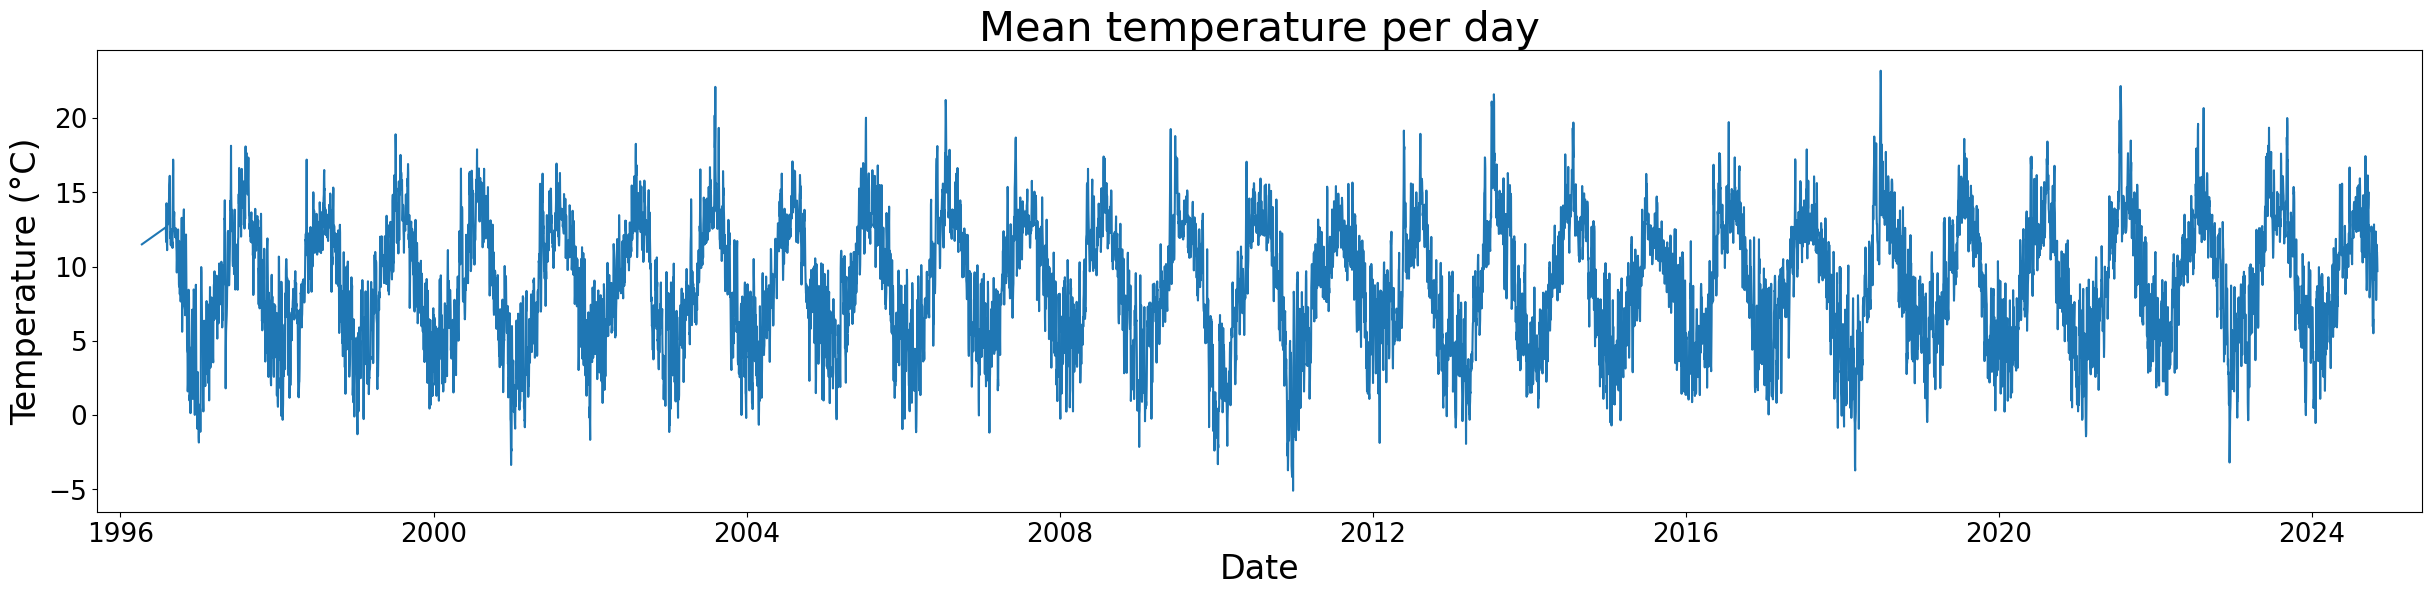

In [160]:
plt.figure(figsize=(30, 6))  
#sns.scatterplot(data=rs_mean_day, x='date', y='temp', marker='.')
sns.lineplot(data=rs_mean_day, x='date', y='temp')
plt.title('Mean temperature per day', fontsize=30)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Temperature (°C)', fontsize=24)
plt.tick_params(axis='both', labelsize=19) 
plt.margins(x=0.02)


## Mean temperature per month
***

In [105]:
rs_month = df.resample('1ME')  # resampling the dataset to monthly frequency
rs_mean_month = rs_month.mean()  # getting the mean for the numeric columns
rs_mean_month = rs_mean_month[rs_mean_month['temp'].notna()] # removing rows where 'temp' is NaN

#print(rs_mean_month) # quick checking output

Text(0, 0.5, 'Temperature')

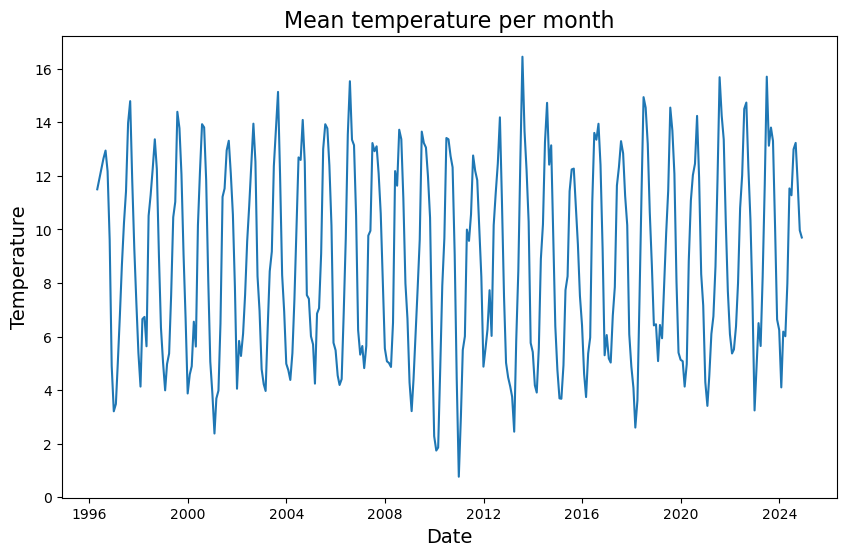

In [106]:
plt.figure(figsize=(10, 6))  
sns.lineplot(data=rs_mean_month, x='date', y='temp')
plt.title('Mean temperature per month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

## Wind speed
***

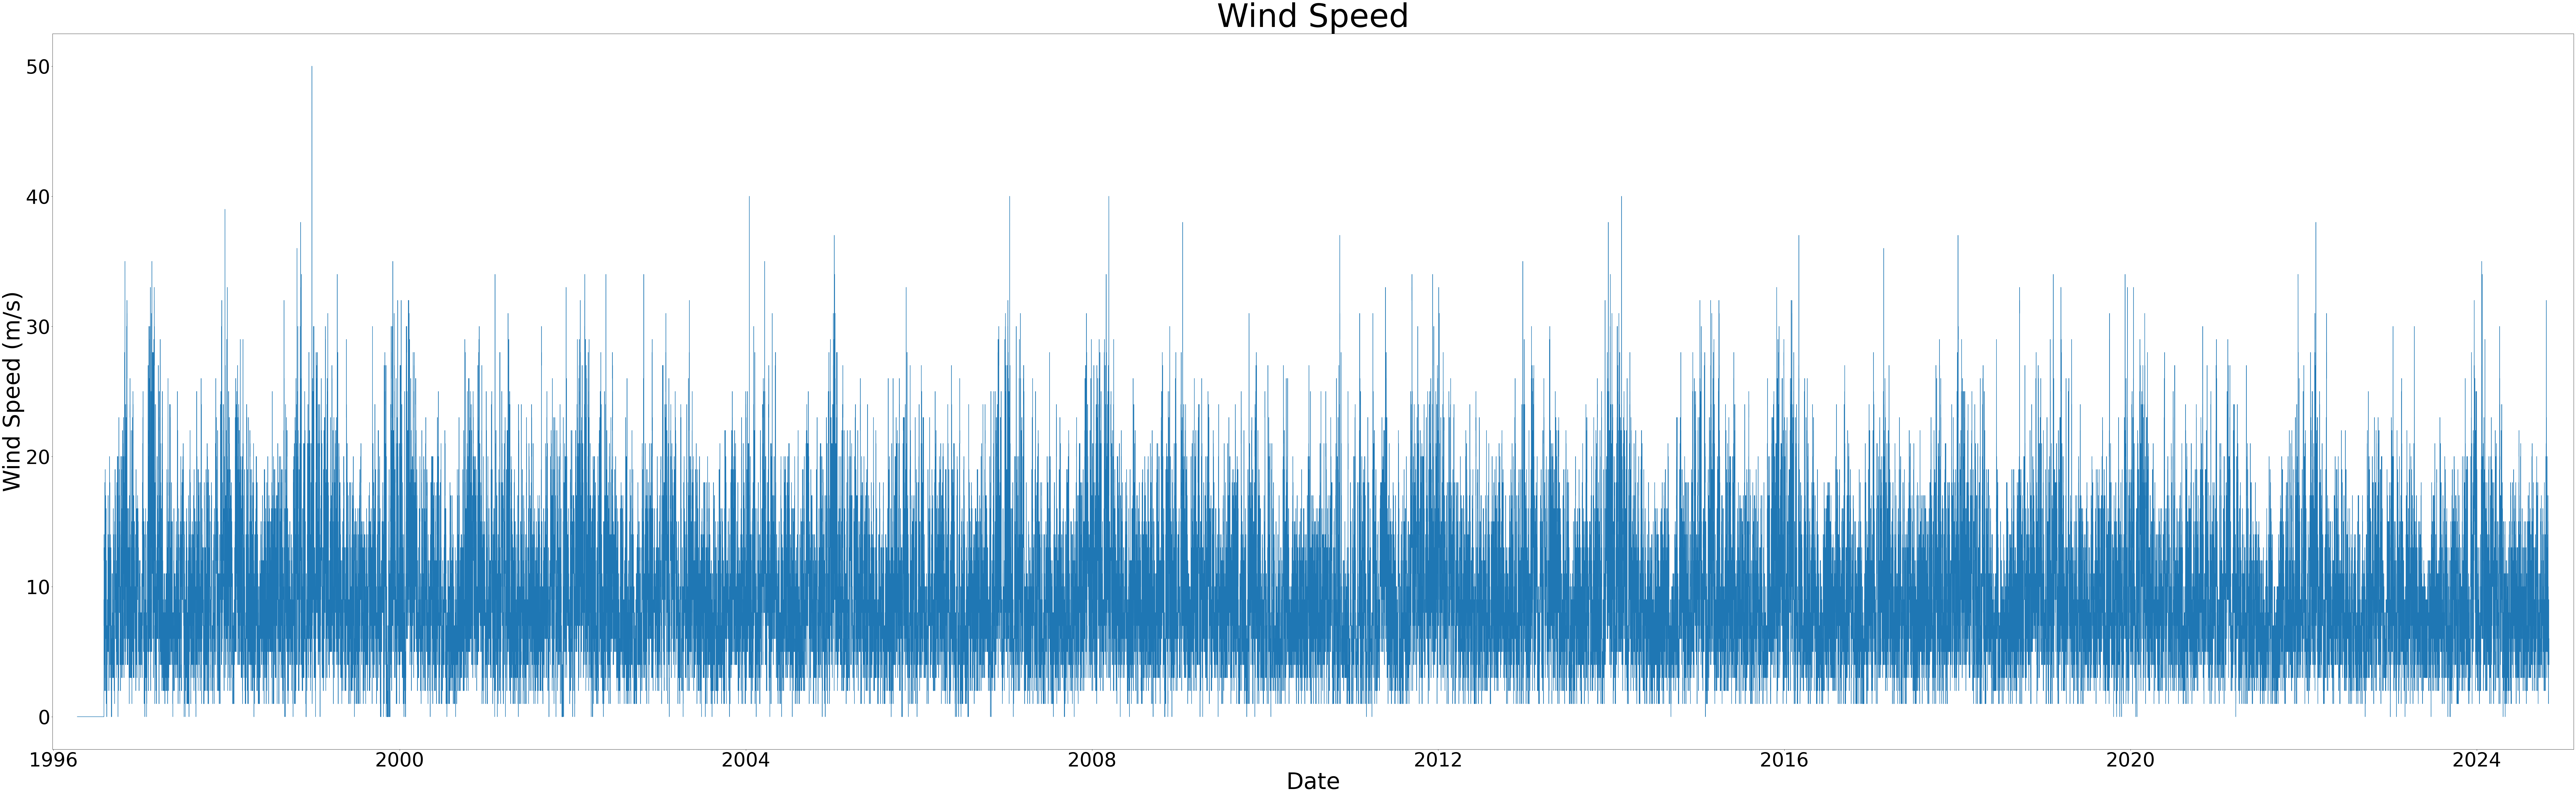

In [175]:
plt.figure(figsize=(140, 40)) # increasing the figure size so that the plot can be easier read due to the large amount of data in the dataset to plot
sns.lineplot(data=df, x='date', y='wdsp')
plt.title('Wind Speed', fontsize=100)
plt.xlabel('Date', fontsize=70)
plt.ylabel('Wind Speed (m/s)', fontsize=70)
plt.tick_params(axis='both', labelsize=60) # increasing the size of the label values on the x and y axis since the size of the figure is increased
plt.margins(x=0.01)  # shortening the buffer around the x-axis using margins to keep the x parameters around 3% around the max and min
#plt.savefig('testsize_3.png')


## Rolling average wind speed (m/s)  per 24 hours interval
***
Plotting the rolling mean for the wind speed at 24h intervals for the entire dataset.  
This provides a sense of the general wind conditions over the past day.

In [179]:
df['wdsp_rolling_24h'] = df['wdsp'].rolling(window='24h').mean()
monthly_average_rolling_wdsp = df['wdsp_rolling_24h'].resample('ME').mean()
print (df['wdsp_rolling_24h'])

date
1996-04-10 14:00:00    0.000000
1996-07-31 08:00:00    0.000000
1996-07-31 09:00:00    0.000000
1996-07-31 10:00:00    0.000000
1996-07-31 11:00:00    0.000000
                         ...   
2024-10-31 20:00:00    5.916667
2024-10-31 21:00:00    5.791667
2024-10-31 22:00:00    5.583333
2024-10-31 23:00:00    5.500000
2024-11-01 00:00:00    5.500000
Name: wdsp_rolling_24h, Length: 247674, dtype: float64


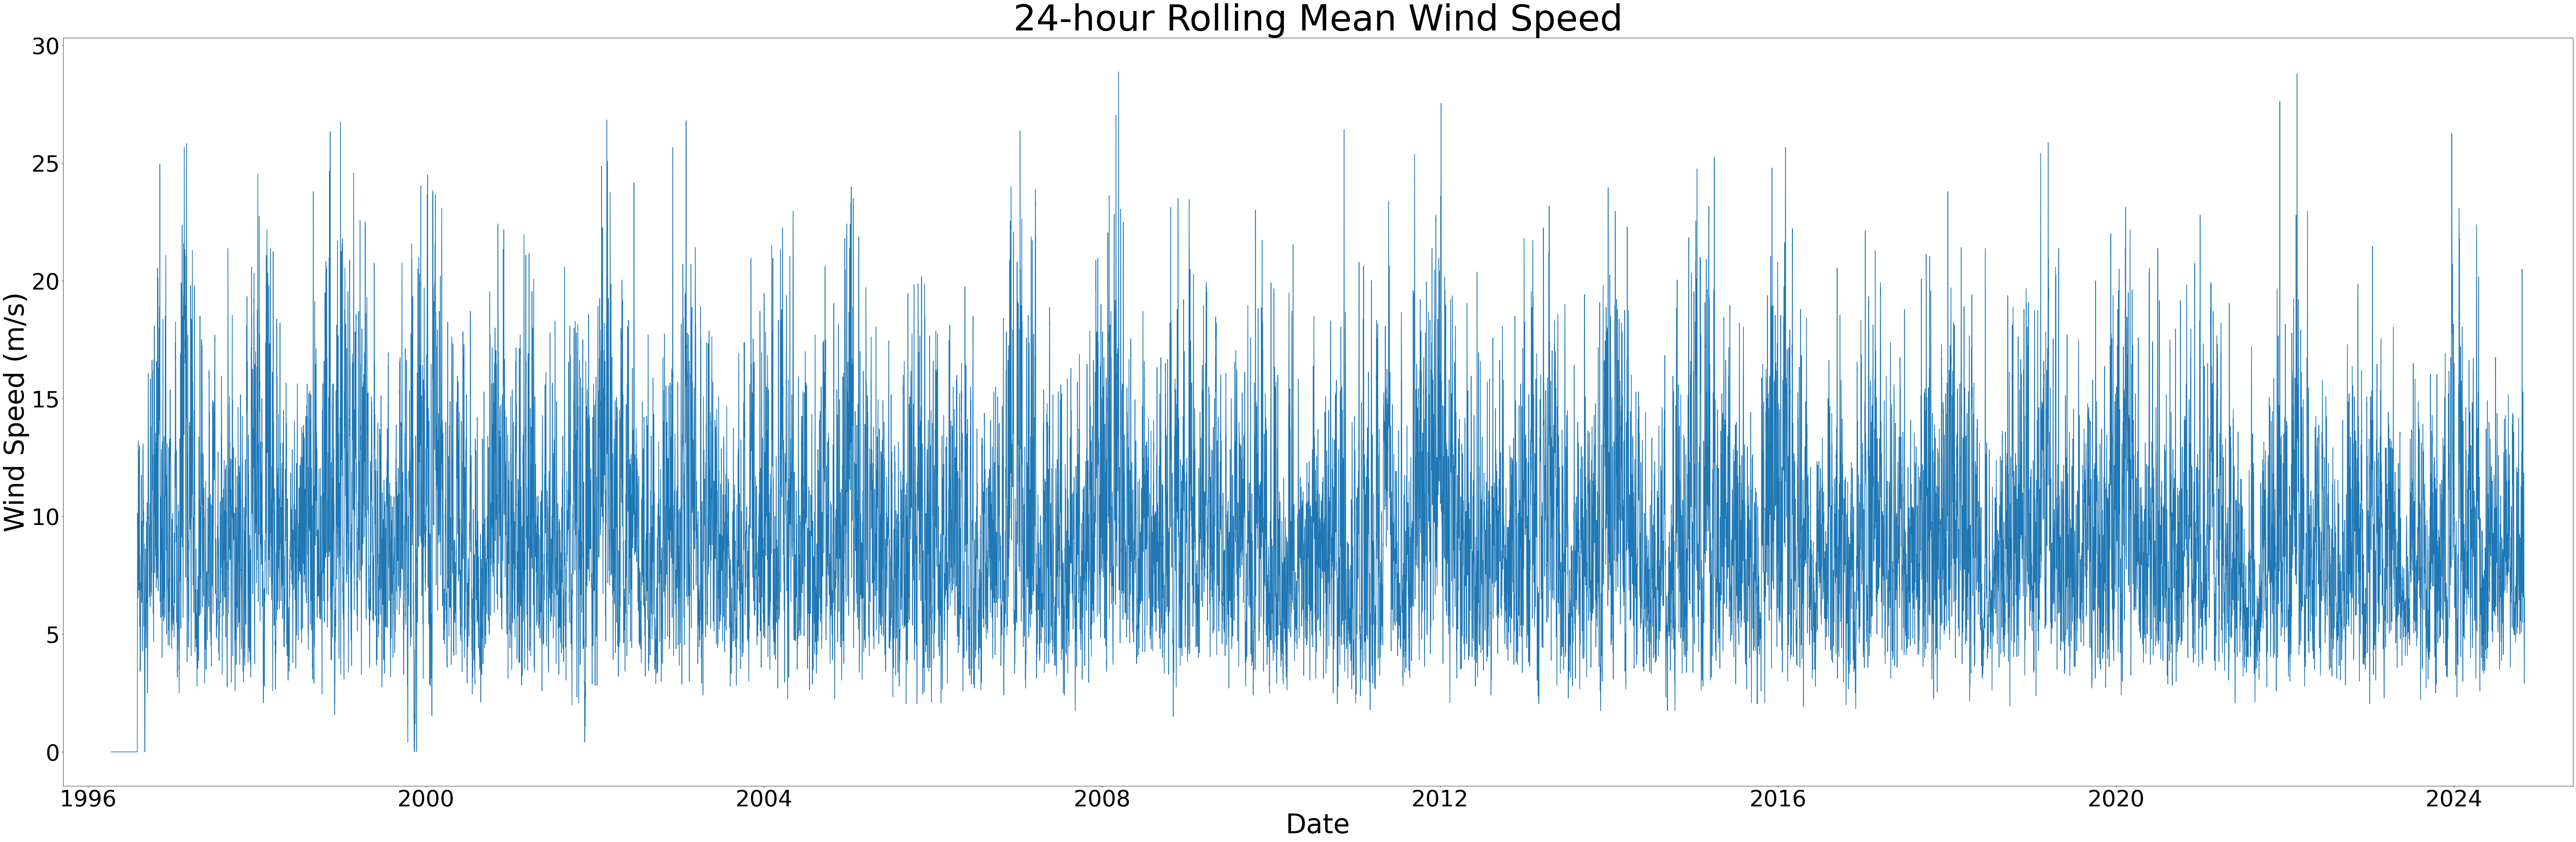

In [ ]:
plt.figure(figsize=(100, 30))
sns.lineplot(x=df.index, y=df['wdsp_rolling_24h'])
plt.title('24-hour Rolling Mean Wind Speed', fontsize=80)
plt.xlabel('Date', fontsize=60)
plt.ylabel('Wind Speed (m/s)', fontsize=60)
plt.tick_params(axis='both', labelsize=50) 
plt.margins(x=0.02)
#plt.savefig('testsize_1.png')

monthly_average_rolling_wdsp = df['wdsp_rolling_24h'].resample('ME').mean()



## Monthly averages of the 24-hour rolling mean wind speed
***
As the above plot is still quite clutter due to the amount data in the file, next the 24-hour rolling mean wind speed data will be resampled to monthy intervals to get the monthly mean of the rolling average.

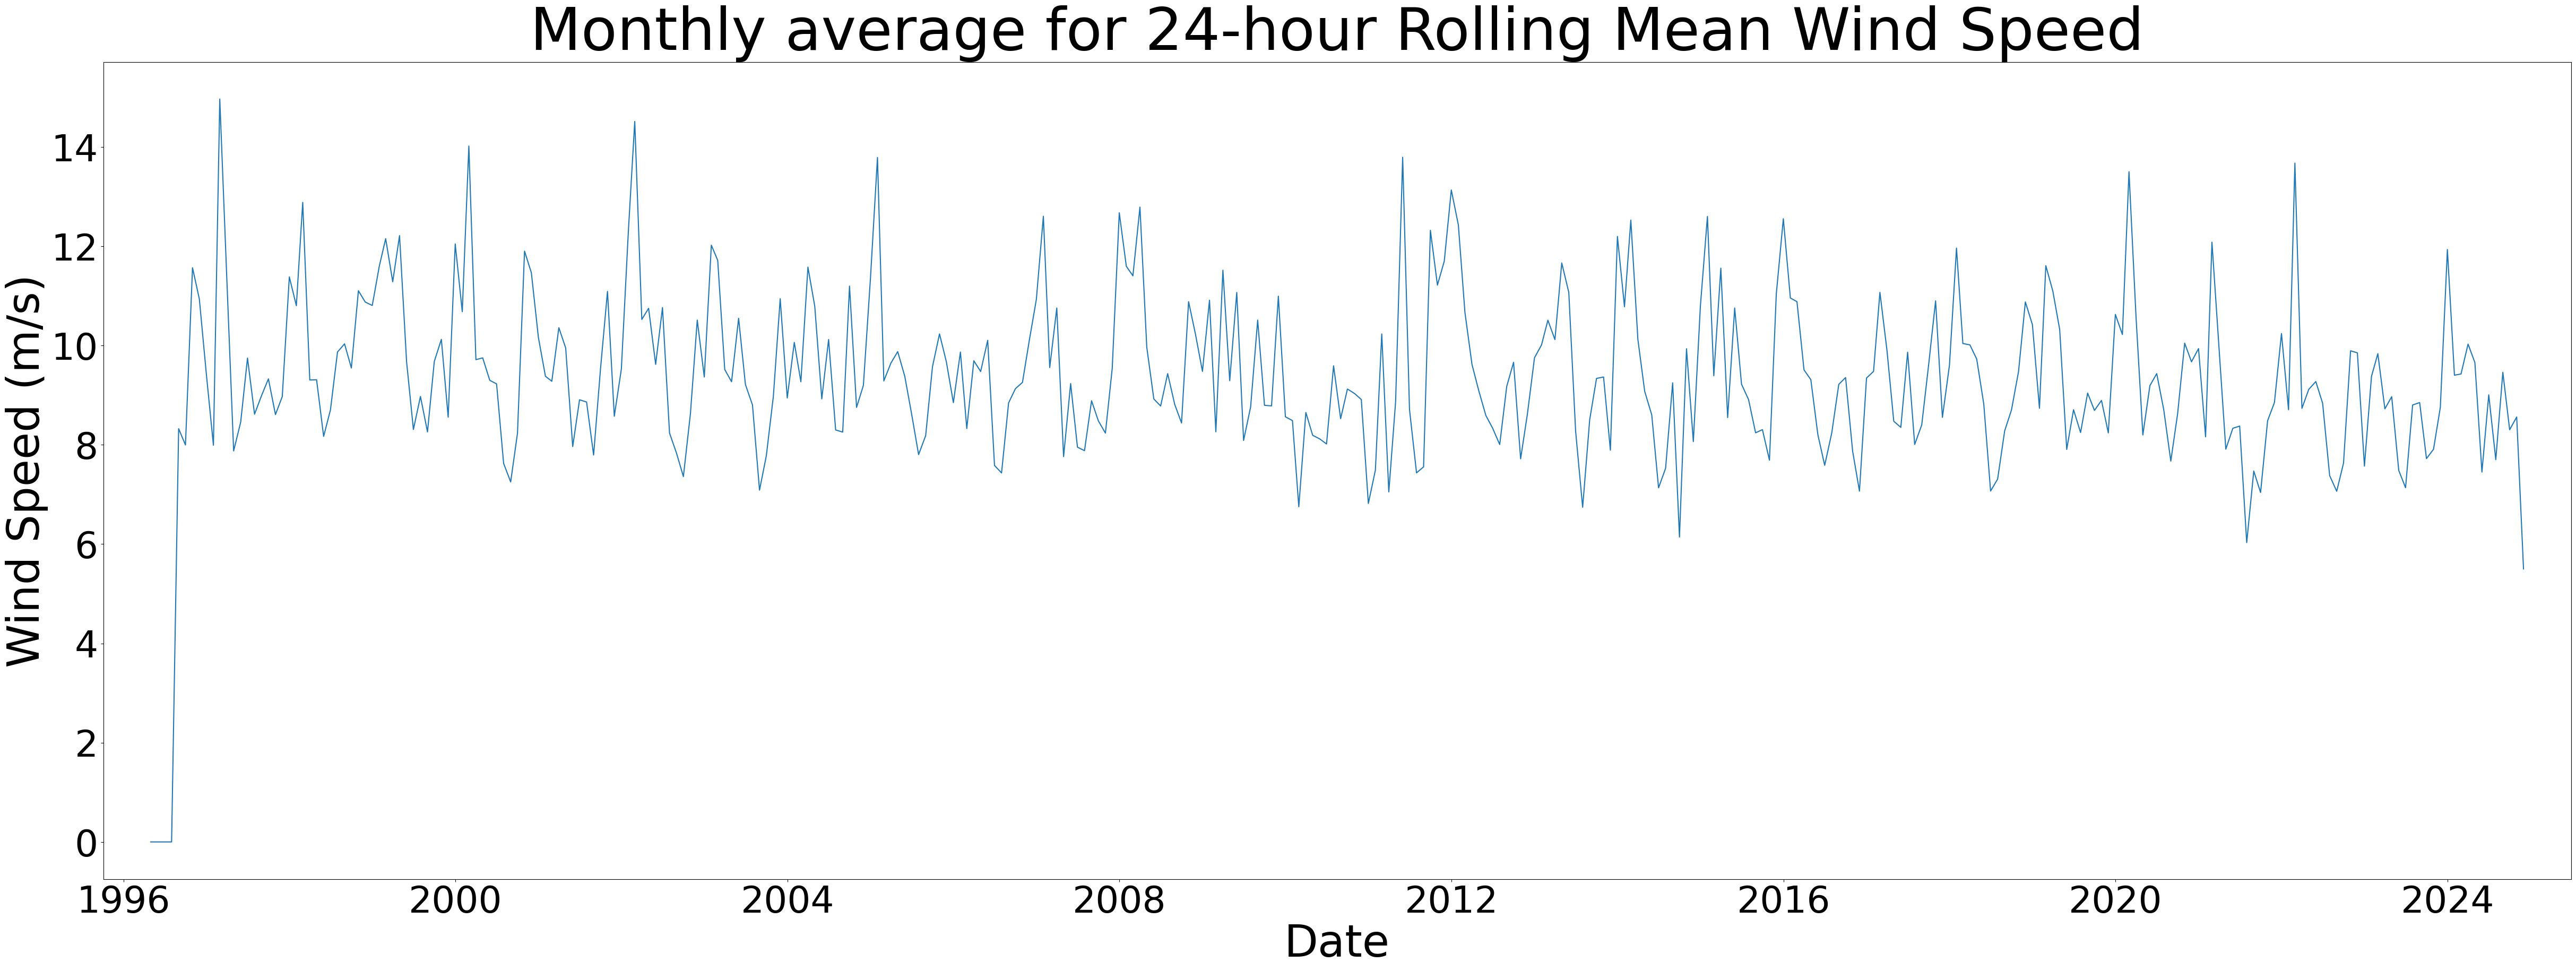

In [ ]:
plt.figure(figsize=(60, 20))
sns.lineplot(x=monthly_average_rolling_wdsp.index, y=monthly_average_rolling_wdsp)
plt.title('Monthly average of 24-hour rolling mean wind Speed', fontsize=80)
plt.xlabel('Date', fontsize=60)
plt.ylabel('Wind Speed (m/s)', fontsize=60)
plt.tick_params(axis='both', labelsize=50) 
plt.margins(x=0.02)
#plt.savefig('testsize_1.png')

monthly_average_rolling_wdsp = df['wdsp_rolling_24h'].resample('ME').mean()



## Daily max wind speed
***

date
1996-04-10     0.0
1996-04-11     NaN
1996-04-12     NaN
1996-04-13     NaN
1996-04-14     NaN
              ... 
2024-10-28    14.0
2024-10-29     6.0
2024-10-30     9.0
2024-10-31     9.0
2024-11-01     6.0
Freq: D, Name: wdsp, Length: 10433, dtype: float64


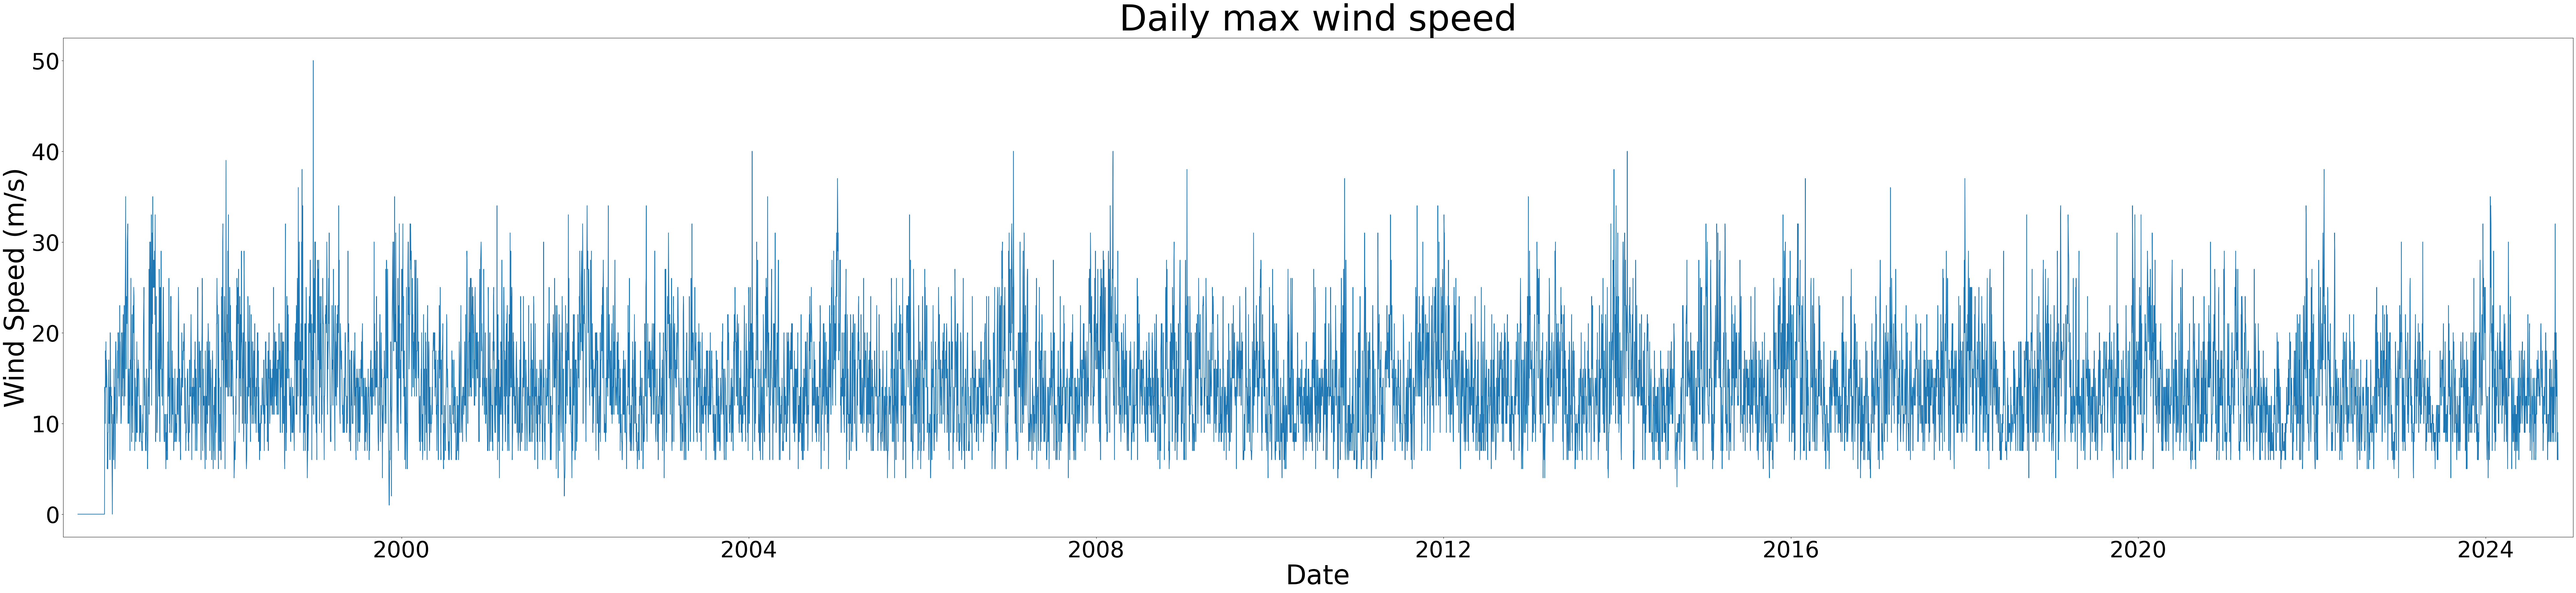

In [ ]:
daily_max_wdsp = df['wdsp'].resample('1D').max() # resampling the windspeed data set at daily intervals and picking the max of each day
#print(daily_max_wdsp)
plt.figure(figsize=(100, 20))
sns.lineplot(x=daily_max_wdsp.index, y=daily_max_wdsp)
plt.title('Daily max wind speed', fontsize=80)
plt.xlabel('Date', fontsize=60)
plt.ylabel('Wind Speed (m/s)', fontsize=60)
plt.tick_params(axis='both', labelsize=50) 
plt.margins(x=0.03)


## The monthly mean of the daily max windspeeds
***

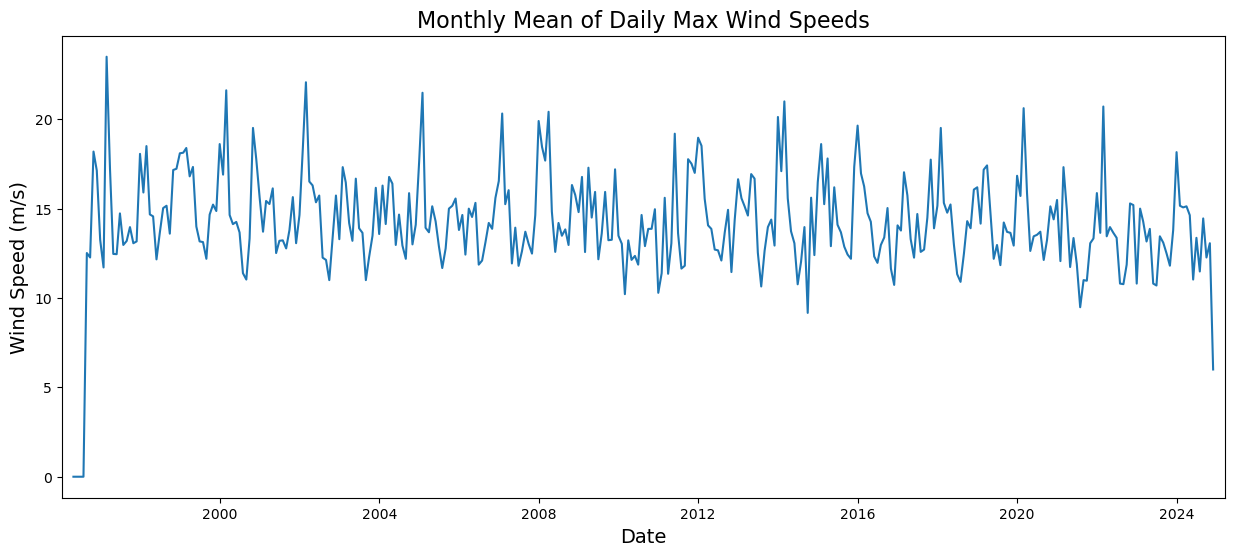

In [173]:
monthly_daily_mean = daily_max_wdsp.resample('ME').mean() # resampling the daily max speed dataset to monthly intervals 

plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_daily_mean.index, y=monthly_daily_mean)
plt.title('Monthly Mean of Daily Max Wind Speeds', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.margins(x=0.01)
